In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [521]:
df = pd.read_csv('autompg.csv')

In [522]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [523]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [524]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [525]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [526]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [527]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [528]:
junk_values = df.values == '?'
junk_values_questionmark = df[junk_values]
junk_values_questionmark.shape

(6, 9)

In [529]:
junk_values_index = junk_values_questionmark.index
np.array(junk_values_index)

array([ 32, 126, 330, 336, 354, 374], dtype=int64)

In [530]:
df.loc[junk_values_index,'horsepower'] = [np.nan]

In [531]:
df[df['car name'] == 'ford pinto']#['horsepower']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
112,19.0,4,122.0,85,2310,18.5,73,1,ford pinto
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
206,26.5,4,140.0,72,2565,13.6,76,1,ford pinto


In [532]:
df["horsepower"] = df["horsepower"].astype(str).astype(float)

In [533]:
df[df['car name'] == 'ford pinto']['horsepower'].mean()

83.4

In [534]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [535]:
df.dropna(inplace=True)

In [536]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [537]:
len(df['car name'].unique())

301

In [538]:
car_group_Count = df['car name'].value_counts().sort_values(ascending=True)

In [539]:
equal_1 = car_group_Count[car_group_Count == 1]
equal_1

fiat 124 tc                     1
toyota celica gt liftback       1
amc concord d/l                 1
datsun 310                      1
triumph tr7 coupe               1
                               ..
mazda rx2 coupe                 1
volkswagen jetta                1
chrysler new yorker brougham    1
ford pinto (sw)                 1
chevrolet vega (sw)             1
Name: car name, Length: 245, dtype: int64

In [540]:
#most of the carmodel having only one entry. So we can put others for car count having one
df2 = df.copy()
df2['car name']=df2['car name'].apply(lambda x: 'others' if x in equal_1 else x)

In [541]:
print(len(df2['car name'].unique()))
df2['car name'].unique()

57


array(['chevrolet chevelle malibu', 'others', 'ford galaxie 500',
       'chevrolet impala', 'plymouth fury iii', 'pontiac catalina',
       'buick estate wagon (sw)', 'plymouth duster', 'amc hornet',
       'ford maverick', 'datsun pl510', 'peugeot 504', 'amc gremlin',
       'toyota corona', 'amc matador', 'ford country squire (sw)',
       'opel 1900', 'toyota corolla 1200', 'chevrolet vega',
       'amc matador (sw)', 'ford gran torino (sw)', 'chevrolet malibu',
       'ford gran torino', 'chevrolet caprice classic', 'ford ltd',
       'plymouth valiant', 'ford pinto', 'fiat 128', 'opel manta',
       'audi 100ls', 'saab 99le', 'toyota mark ii', 'chevrolet nova',
       'chevrolet chevelle malibu classic', 'volkswagen dasher',
       'datsun 710', 'dodge colt', 'honda civic', 'subaru',
       'buick century', 'toyota corolla', 'volkswagen rabbit',
       'honda civic cvcc', 'chevrolet chevette', 'vw rabbit',
       'buick skylark', 'chevrolet monte carlo landau', 'subaru dl',
     

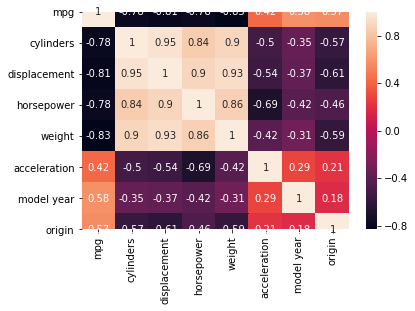

In [542]:
sns.heatmap(df2.corr(),annot=True)

In [543]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

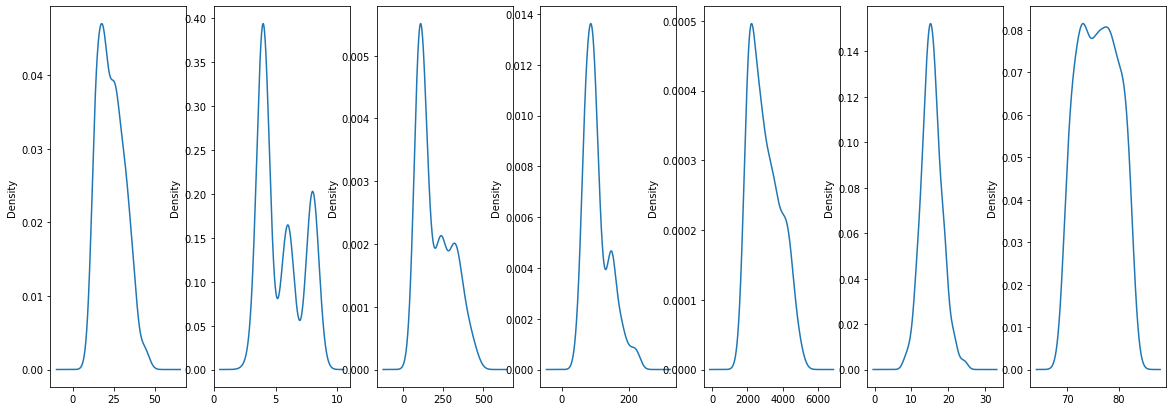

In [544]:
f,ax = plt.subplots(ncols=7,figsize=(20,7))
i=0
for col in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']:
    df2[col].plot(kind='kde',ax=ax[i])
    i=i+1

In [545]:
df2.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

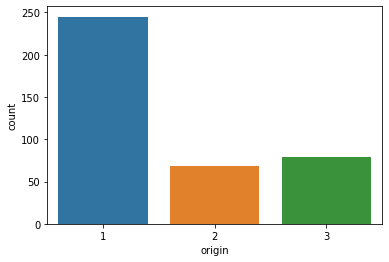

In [546]:
sns.countplot(x='origin',data = df2)

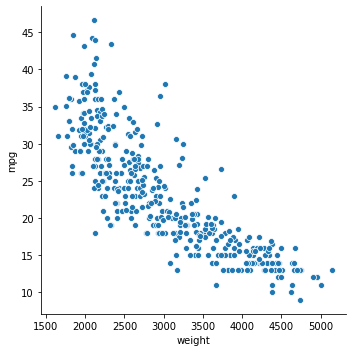

In [547]:
 sns.relplot(x='weight',y='mpg',data=df2)

if weight inreases , mpg decreases

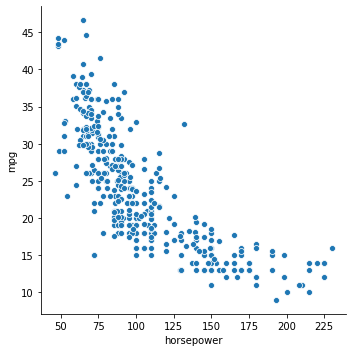

In [548]:
 sns.relplot(x='horsepower',y='mpg',data=df2)

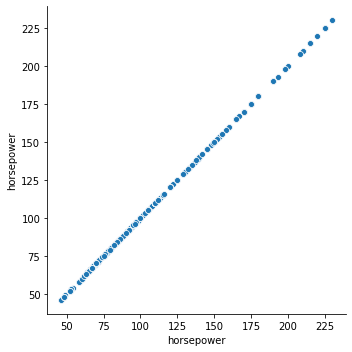

In [549]:
 sns.relplot(x='horsepower',y='horsepower',data=df2)

#weight increases horse power increases

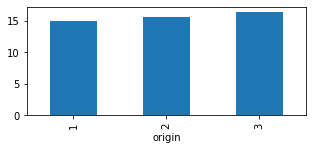

In [550]:
plt.figure(figsize=(5,2))
acc = df2.groupby('origin')['acceleration'].median()
acc.plot(kind='bar')

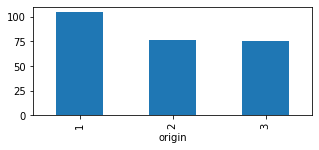

In [551]:
plt.figure(figsize=(5,2))
acc = df2.groupby('origin')['horsepower'].median()
acc.plot(kind='bar')

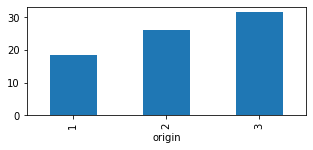

In [552]:
plt.figure(figsize=(5,2))
acc = df2.groupby('origin')['mpg'].median()
acc.plot(kind='bar')

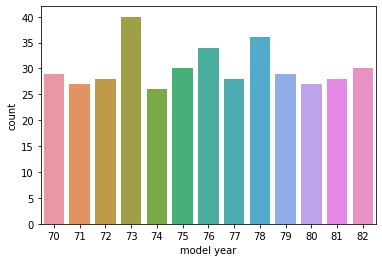

In [553]:
sns.countplot(x='model year',data=df2)

#most of cars introduce in 1973

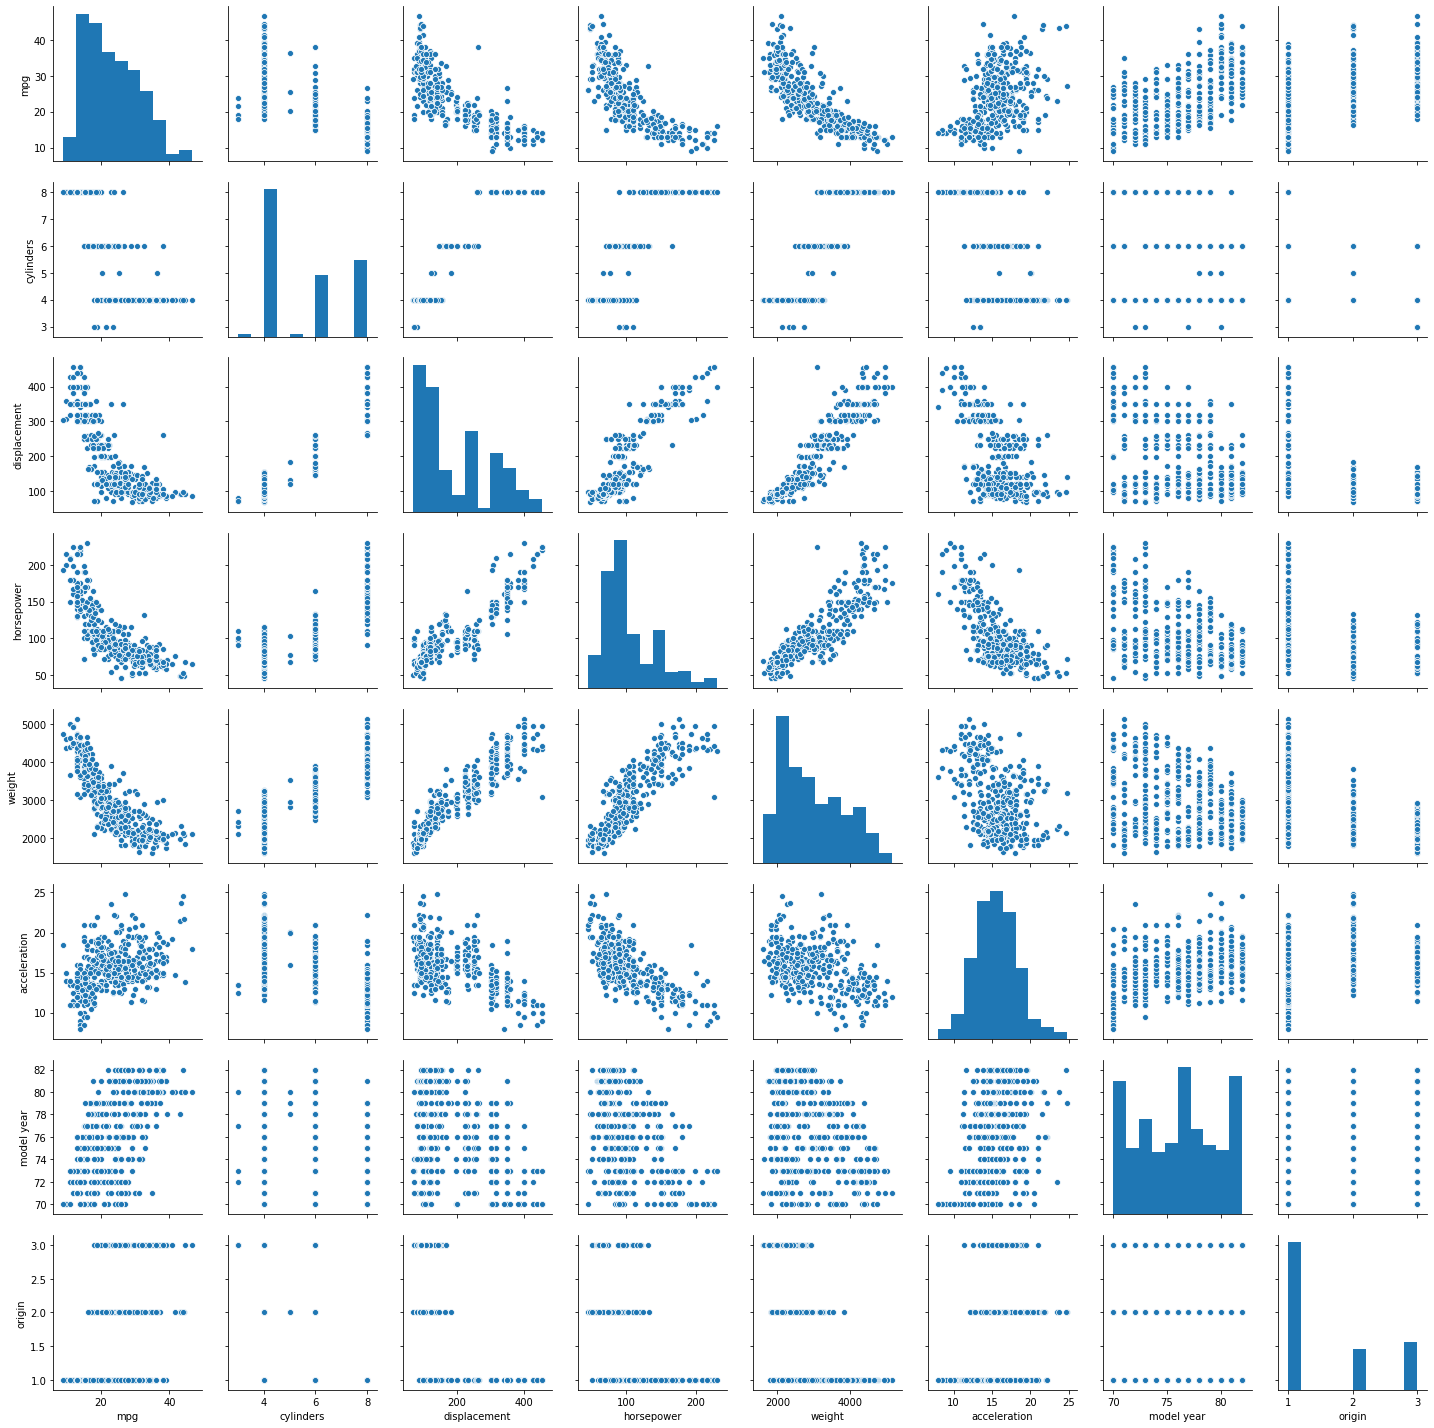

In [554]:
sns.pairplot(df2)

In [555]:
df2['model year'].unique()
#even though yer in numric, they should considered as catagory which it needs dummy columns should get created

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

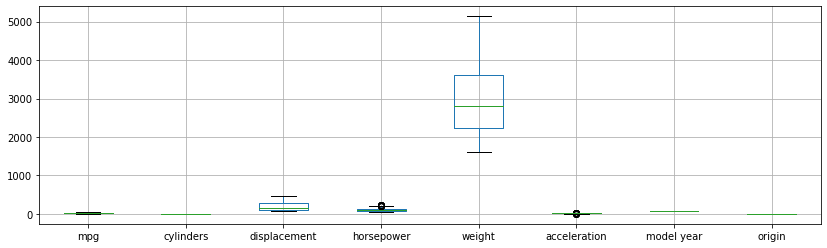

In [556]:
plt.figure(figsize=(14,4))
df2.boxplot()

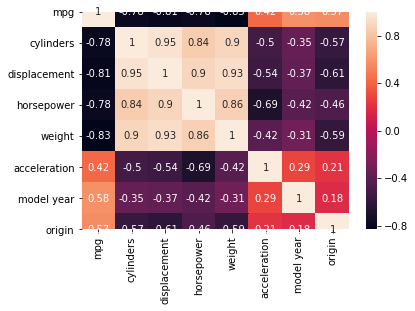

In [557]:
sns.heatmap(df2.corr(),annot=True)

In [558]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,others
2,18.0,8,318.0,150.0,3436,11.0,70,1,others
3,16.0,8,304.0,150.0,3433,12.0,70,1,others
4,17.0,8,302.0,140.0,3449,10.5,70,1,others


In [559]:
df2.groupby('model year')['car name'].count()

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: car name, dtype: int64

In [560]:
#we can drop car name ,as it's not having more importance
df2.drop(columns=['car name'],inplace=True)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [561]:
col=['origin','model year']
df2=pd.get_dummies(data=df2,drop_first=True,columns=col)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_2,origin_3,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [562]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_2,origin_3,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [563]:
X=df2.drop(columns=['mpg'])
y=df2['mpg']

In [564]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(274, 19) (274,)
(118, 19) (118,)


In [565]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, explained_variance_score ,r2_score
from sklearn.model_selection import cross_val_score
def  model_Anaysis(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('cross_val_score:',cross_val_score(model, X_train, y_train,cv=5).mean())
    print('R2 model score:',model.score(X_test,y_test))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('explained_variance_score:',explained_variance_score(y_test,pred)) 
    print('r2_score:',r2_score(y_test,pred))

In [566]:
from sklearn.linear_model import LinearRegression
model_Anaysis(LinearRegression())

cross_val_score: 0.8130543096070898
R2 model score: 0.8326333267592542
mean_squared_error: 8.854505360368767
mean_absolute_error: 2.29402251409129
explained_variance_score: 0.8360302108055757
r2_score: 0.8326333267592542


In [567]:
from sklearn.ensemble import GradientBoostingRegressor
model_Anaysis(GradientBoostingRegressor())

cross_val_score: 0.8573164888197311
R2 model score: 0.7600031621803124
mean_squared_error: 12.696991855058442
mean_absolute_error: 2.4778062328438284
explained_variance_score: 0.7781711081185432
r2_score: 0.7600031621803124


In [568]:
from sklearn.ensemble import AdaBoostRegressor
model_Anaysis(AdaBoostRegressor(n_estimators=70,learning_rate=2.05))

cross_val_score: 0.7928902721398903
R2 model score: 0.7012825430711903
mean_squared_error: 15.803596214207007
mean_absolute_error: 3.050632025725866
explained_variance_score: 0.7530109941885955
r2_score: 0.7012825430711903


In [569]:
from sklearn.ensemble import RandomForestRegressor
model_Anaysis(RandomForestRegressor(n_estimators=80))

cross_val_score: 0.8167829100401439
R2 model score: 0.7441317816756432
mean_squared_error: 13.536664539194893
mean_absolute_error: 2.6031144067796603
explained_variance_score: 0.7618660847630045
r2_score: 0.7441317816756432


In [575]:
#based on above analyssi, GradientBoost is giving good result. So tuning it to get better result below

In [573]:
from sklearn.ensemble import GradientBoostingRegressor
final_model=GradientBoostingRegressor(n_estimators=200,subsample=1,alpha=0.8,tol=0.0001,criterion ='mse',
                                        min_samples_split=100)
final_model.fit(X_train,y_train)
final_model.score(X_test,y_test)

0.7766380165662299

In [574]:
import pickle
file_name='Loan_model.pkl'
pickle.dump(final_model,open(file_name,'wb'))

final_model = pickle.load(open(file_name,'rb'))
pred = final_model.predict(X_test)
print(r2_score(y_test,pred))

0.7766380165662299
